<b>Train FastText embeddings using gensim</b> (Source: https://radimrehurek.com/gensim/auto_examples/tutorials/run_fasttext.html)

In [1]:
from pprint import pprint as print
from gensim.models.fasttext import FastText
from gensim.models import KeyedVectors

Load corpus & Preprocess raw text (Remove punctuation and numbers) (ca. 1.5h per corpus)

In [ ]:
import spacy

nlp = spacy.load("de_core_news_sm")

new_corpus = []
#i=1
with open('raw_data/deu_news_2020_1M-sentences.txt', 'r', encoding='utf-8') as f:
    for line in f.readlines():
        doc = nlp(line)
        new_line = [token.lower_ for token in doc if token.is_alpha]
        for j in range(10):
            new_line.append('$')
        new_corpus.append(' '.join(new_line))
        #i+=1
        #if i>200:
            #break 
    f.close()

with open('clean_data/deu_news_2020_clean.txt', 'w', encoding='utf-8') as f_out:
    for line in new_corpus:
        f_out.write(line)
        f_out.write('\n')
    f_out.close()

Train models and save word vectors with gensim 4.0.1

In [7]:
corpus_file_1995 = 'clean_data/deu_news_1995_clean.txt'
model_1995 = FastText(sg=1, size=300, negative=8, window=10)
model_1995.build_vocab(corpus_file=corpus_file_1995)
model_1995.train(
    corpus_file=corpus_file_1995, epochs=model_1995.epochs,
    total_examples=model_1995.corpus_count, total_words=model_1995.corpus_total_words,
)
wv_1995 = model_1995.wv

In [9]:
corpus_file_2010 = 'clean_data/deu_news_2010_clean.txt'
model_2010 = FastText(sg=1, size=300, negative=8, window=10)
model_2010.build_vocab(corpus_file=corpus_file_2010)
model_2010.train(
    corpus_file=corpus_file_2010, epochs=model_2010.epochs,
    total_examples=model_2010.corpus_count, total_words=model_2010.corpus_total_words,
)
wv_2010 = model_2010.wv

In [10]:
corpus_file_2020 = 'clean_data/deu_news_2020_clean.txt'
model_2020 = FastText(sg=1, size=300, negative=8, window=10)
model_2020.build_vocab(corpus_file=corpus_file_2020)
model_2020.train(
    corpus_file=corpus_file_2020, epochs=model_2020.epochs,
    total_examples=model_2020.corpus_count, total_words=model_2020.corpus_total_words,
)
wv_2020 = model_2020.wv

Save keyed vectors

In [11]:
wv_1995.save("gensim4.0.1_ft_models/vectors_1995_neg_8.kv")
wv_2010.save("gensim4.0.1_ft_models/vectors_2010_neg_8.kv")
wv_2020.save("gensim4.0.1_ft_models/vectors_2020_neg_8.kv")

Load old version keyed vectors

In [2]:
wv_1995 = KeyedVectors.load("gensim4.0.1_ft_models/vectors_1995.kv", mmap='r')
wv_2010 = KeyedVectors.load("gensim4.0.1_ft_models/vectors_2010.kv", mmap='r')
wv_2020 = KeyedVectors.load("gensim4.0.1_ft_models/vectors_2020.kv", mmap='r')

Example analogy set

In [ ]:
print(wv_1995.most_similar(positive=['frau', 'arzt'], negative=['mann']))
print(wv_2010.most_similar(positive=['frau', 'arzt'], negative=['mann']))
print(wv_2020.most_similar(positive=['frau', 'arzt'], negative=['mann']))

Evaluate general performance on semantic German analogy set, Source: https://devmount.github.io/GermanWordEmbeddings/ 

In [8]:
analogies_result = wv_1995.evaluate_word_analogies('questions/semantic_evaluation.txt')
print(analogies_result)

(0.2604166666666667,
 [{'correct': [('ENGLAND', 'PFUND', 'USA', 'DOLLAR'),
               ('RUSSLAND', 'RUBEL', 'USA', 'DOLLAR')],
   'incorrect': [('CHINA', 'YUAN', 'DEUTSCHLAND', 'EURO'),
                 ('CHINA', 'YUAN', 'DÄNEMARK', 'KRONE'),
                 ('CHINA', 'YUAN', 'ENGLAND', 'PFUND'),
                 ('CHINA', 'YUAN', 'JAPAN', 'YEN'),
                 ('CHINA', 'YUAN', 'RUSSLAND', 'RUBEL'),
                 ('CHINA', 'YUAN', 'USA', 'DOLLAR'),
                 ('DEUTSCHLAND', 'EURO', 'DÄNEMARK', 'KRONE'),
                 ('DEUTSCHLAND', 'EURO', 'ENGLAND', 'PFUND'),
                 ('DEUTSCHLAND', 'EURO', 'JAPAN', 'YEN'),
                 ('DEUTSCHLAND', 'EURO', 'RUSSLAND', 'RUBEL'),
                 ('DEUTSCHLAND', 'EURO', 'USA', 'DOLLAR'),
                 ('DÄNEMARK', 'KRONE', 'ENGLAND', 'PFUND'),
                 ('DÄNEMARK', 'KRONE', 'JAPAN', 'YEN'),
                 ('DÄNEMARK', 'KRONE', 'RUSSLAND', 'RUBEL'),
                 ('DÄNEMARK', 'KRONE', 'USA', 'DOLLAR

In [12]:
analogies_result = wv_2010.evaluate_word_analogies('questions/semantic_evaluation.txt')
print(analogies_result)

(0.2708757637474542,
 [{'correct': [('DEUTSCHLAND', 'EURO', 'ENGLAND', 'PFUND'),
               ('DEUTSCHLAND', 'EURO', 'USA', 'DOLLAR')],
   'incorrect': [('CHINA', 'YUAN', 'DEUTSCHLAND', 'EURO'),
                 ('CHINA', 'YUAN', 'DÄNEMARK', 'KRONE'),
                 ('CHINA', 'YUAN', 'ENGLAND', 'PFUND'),
                 ('CHINA', 'YUAN', 'JAPAN', 'YEN'),
                 ('CHINA', 'YUAN', 'RUSSLAND', 'RUBEL'),
                 ('CHINA', 'YUAN', 'USA', 'DOLLAR'),
                 ('DEUTSCHLAND', 'EURO', 'DÄNEMARK', 'KRONE'),
                 ('DEUTSCHLAND', 'EURO', 'JAPAN', 'YEN'),
                 ('DEUTSCHLAND', 'EURO', 'RUSSLAND', 'RUBEL'),
                 ('DÄNEMARK', 'KRONE', 'ENGLAND', 'PFUND'),
                 ('DÄNEMARK', 'KRONE', 'JAPAN', 'YEN'),
                 ('DÄNEMARK', 'KRONE', 'RUSSLAND', 'RUBEL'),
                 ('DÄNEMARK', 'KRONE', 'USA', 'DOLLAR'),
                 ('ENGLAND', 'PFUND', 'JAPAN', 'YEN'),
                 ('ENGLAND', 'PFUND', 'RUSSLAND', 'RUB

In [13]:
analogies_result = wv_2020.evaluate_word_analogies('questions/semantic_evaluation.txt')
print(analogies_result)

(0.19791666666666666,
 [{'correct': [('DEUTSCHLAND', 'EURO', 'ENGLAND', 'PFUND'),
               ('DEUTSCHLAND', 'EURO', 'USA', 'DOLLAR'),
               ('ENGLAND', 'PFUND', 'USA', 'DOLLAR')],
   'incorrect': [('CHINA', 'YUAN', 'DEUTSCHLAND', 'EURO'),
                 ('CHINA', 'YUAN', 'DÄNEMARK', 'KRONE'),
                 ('CHINA', 'YUAN', 'ENGLAND', 'PFUND'),
                 ('CHINA', 'YUAN', 'JAPAN', 'YEN'),
                 ('CHINA', 'YUAN', 'RUSSLAND', 'RUBEL'),
                 ('CHINA', 'YUAN', 'USA', 'DOLLAR'),
                 ('DEUTSCHLAND', 'EURO', 'DÄNEMARK', 'KRONE'),
                 ('DEUTSCHLAND', 'EURO', 'JAPAN', 'YEN'),
                 ('DEUTSCHLAND', 'EURO', 'RUSSLAND', 'RUBEL'),
                 ('DÄNEMARK', 'KRONE', 'ENGLAND', 'PFUND'),
                 ('DÄNEMARK', 'KRONE', 'JAPAN', 'YEN'),
                 ('DÄNEMARK', 'KRONE', 'RUSSLAND', 'RUBEL'),
                 ('DÄNEMARK', 'KRONE', 'USA', 'DOLLAR'),
                 ('ENGLAND', 'PFUND', 'JAPAN', 'YEN'),

Gensim English question set

In [6]:
analogies_result = wv_2020.evaluate_word_analogies('questions/gensim questions-words.txt')
print(analogies_result)

(0.1386615310544054,
 [{'correct': [('BEIJING', 'CHINA', 'KABUL', 'AFGHANISTAN'),
               ('LONDON', 'ENGLAND', 'KABUL', 'AFGHANISTAN')],
   'incorrect': [('BANGKOK', 'THAILAND', 'BEIJING', 'CHINA'),
                 ('BANGKOK', 'THAILAND', 'BERLIN', 'GERMANY'),
                 ('BANGKOK', 'THAILAND', 'BERN', 'SWITZERLAND'),
                 ('BANGKOK', 'THAILAND', 'CANBERRA', 'AUSTRALIA'),
                 ('BANGKOK', 'THAILAND', 'HANOI', 'VIETNAM'),
                 ('BANGKOK', 'THAILAND', 'ISLAMABAD', 'PAKISTAN'),
                 ('BANGKOK', 'THAILAND', 'KABUL', 'AFGHANISTAN'),
                 ('BANGKOK', 'THAILAND', 'LONDON', 'ENGLAND'),
                 ('BANGKOK', 'THAILAND', 'OTTAWA', 'CANADA'),
                 ('BANGKOK', 'THAILAND', 'PARIS', 'FRANCE'),
                 ('BANGKOK', 'THAILAND', 'TOKYO', 'JAPAN'),
                 ('BEIJING', 'CHINA', 'BERLIN', 'GERMANY'),
                 ('BEIJING', 'CHINA', 'BERN', 'SWITZERLAND'),
                 ('BEIJING', 'CHINA

Exploration with Responsibly (https://docs.responsibly.ai/)

In [ ]:
from responsibly.we.utils import most_similar, cosine_similarities_by_words

Compute most similar words without restriction (words from sets may be repeated)

In [ ]:
print(most_similar(wv_1995, positive=['frau', 'arzt'], negative=['mann']))
print(most_similar(wv_2010, positive=['frau', 'arzt'], negative=['mann']))
print(most_similar(wv_2020, positive=['frau', 'arzt'], negative=['mann']))

In [ ]:
sample_occupation_list = ['arzt','ärztin','krankenschwester','krankenpfleger']
print(cosine_similarities_by_words(wv_2020, 'frau', sample_occupation_list))
print(cosine_similarities_by_words(wv_2020, 'mann', sample_occupation_list))

<b>Word Embedding Association Test (WEAT) by Chaloner & Maldonado (2019)</b>

Bias categories:

B1: career vs family
B2: maths vs arts 
B3: science vs arts 
B4: intelligence vs appearance
B5: strength vs weakness

Both groups of target words per category are compared to the two attribute sets female and male

In [42]:
import json
from responsibly.we.weat import calc_single_weat

Load translated attribute wordlists 

In [43]:
with open('WEAT_german/weiblich.json', encoding='utf-8') as data:
    w_dict = json.load(data)
    data.close()

with open('WEAT_german/maennlich.json', encoding='utf-8') as data:
    m_dict = json.load(data)
    data.close()

B1: career vs. family

In [ ]:
with open('WEAT_german/beruf.json', encoding='utf-8') as data:
    beruf_dict = json.load(data)
    data.close()

with open('WEAT_german/familie.json', encoding='utf-8') as data:
    fam_dict = json.load(data)
    data.close()

print(calc_single_weat(model=wv_1995, 
                    first_target=beruf_dict, 
                    second_target=fam_dict, 
                    first_attribute=m_dict, 
                    second_attribute=w_dict))

print(calc_single_weat(model=wv_2010, 
                    first_target=beruf_dict,  
                    second_target=fam_dict, 
                    first_attribute=m_dict, 
                    second_attribute=w_dict))

print(calc_single_weat(model=wv_2020, 
                    first_target=beruf_dict, 
                    second_target=fam_dict, 
                    first_attribute=m_dict, 
                    second_attribute=w_dict))

B2: maths vs. arts

In [45]:
with open('WEAT_german/mathematik.json', encoding='utf-8') as data:
    mat_dict = json.load(data)
    data.close()

with open('WEAT_german/kunst.json', encoding='utf-8') as data:
    kunst_dict = json.load(data)
    data.close()

print(calc_single_weat(model=wv_1995, 
                    first_target=mat_dict, 
                    second_target=kunst_dict, 
                    first_attribute=m_dict, 
                    second_attribute=w_dict))

print(calc_single_weat(model=wv_2010, 
                    first_target=mat_dict,  
                    second_target=kunst_dict, 
                    first_attribute=m_dict, 
                    second_attribute=w_dict))

print(calc_single_weat(model=wv_2020, 
                    first_target=mat_dict, 
                    second_target=kunst_dict, 
                    first_attribute=m_dict, 
                    second_attribute=w_dict))

{'Attrib. words': 'männlich vs. weiblich',
 'Na': '11x2',
 'Nt': '8x2',
 'Target words': 'mathematik vs. kunst',
 'd': -1.3693084,
 'p': 0.9987567987567988,
 's': -0.32382796704769135}
{'Attrib. words': 'männlich vs. weiblich',
 'Na': '11x2',
 'Nt': '8x2',
 'Target words': 'mathematik vs. kunst',
 'd': -0.9753964,
 'p': 0.972027972027972,
 's': -0.21385011076927185}
{'Attrib. words': 'männlich vs. weiblich',
 'Na': '11x2',
 'Nt': '8x2',
 'Target words': 'mathematik vs. kunst',
 'd': -0.8105205,
 'p': 0.9402486402486403,
 's': -0.17666323482990265}


B3: science vs arts

In [ ]:
with open('WEAT_german/wissenschaft.json', encoding='utf-8') as data:
    wis_dict = json.load(data)
    data.close()

with open('WEAT_german/kunst.json', encoding='utf-8') as data:
    kunst_dict = json.load(data)
    data.close()

print(calc_single_weat(model=wv_1995, 
                    first_target=wis_dict, 
                    second_target=kunst_dict, 
                    first_attribute=m_dict, 
                    second_attribute=w_dict))

print(calc_single_weat(model=wv_2010, 
                    first_target=wis_dict,  
                    second_target=kunst_dict, 
                    first_attribute=m_dict, 
                    second_attribute=w_dict))

print(calc_single_weat(model=wv_2020, 
                    first_target=wis_dict, 
                    second_target=kunst_dict, 
                    first_attribute=m_dict, 
                    second_attribute=w_dict))

B4: intelligence vs. appearance

In [ ]:
with open('WEAT_german/intelligenz.json', encoding='utf-8') as data:
    int_dict = json.load(data)
    data.close()

with open('WEAT_german/aussehen.json', encoding='utf-8') as data:
    aus_dict = json.load(data)
    data.close()

print(calc_single_weat(model=wv_1995, 
                    first_target=int_dict, 
                    second_target=aus_dict, 
                    first_attribute=m_dict, 
                    second_attribute=w_dict))

print(calc_single_weat(model=wv_2010, 
                    first_target=int_dict,  
                    second_target=aus_dict, 
                    first_attribute=m_dict, 
                    second_attribute=w_dict))

print(calc_single_weat(model=wv_2020, 
                    first_target=int_dict, 
                    second_target=aus_dict, 
                    first_attribute=m_dict, 
                    second_attribute=w_dict))

B5: strength vs. weakness

In [ ]:
with open('WEAT_german/stark.json', encoding='utf-8') as data:
    stark_dict = json.load(data)
    data.close()

with open('WEAT_german/schwach.json', encoding='utf-8') as data:
    schwach_dict = json.load(data)
    data.close()

print(calc_single_weat(model=wv_1995, 
                    first_target=stark_dict, 
                    second_target=schwach_dict, 
                    first_attribute=m_dict, 
                    second_attribute=w_dict))

print(calc_single_weat(model=wv_2010, 
                    first_target=stark_dict,  
                    second_target=schwach_dict, 
                    first_attribute=m_dict, 
                    second_attribute=w_dict))

print(calc_single_weat(model=wv_2020, 
                    first_target=stark_dict, 
                    second_target=schwach_dict, 
                    first_attribute=m_dict, 
                    second_attribute=w_dict))

<b>PCA Visualization</b> Source: https://web.stanford.edu/class/cs224n/materials/Gensim%20word%20vector%20visualization.html

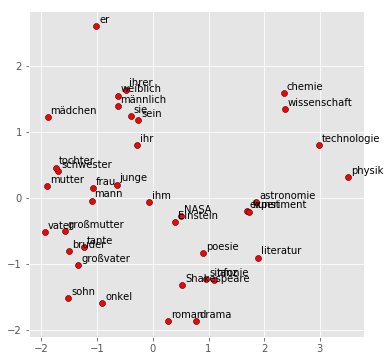

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


plt.style.use('ggplot')

def display_pca_scatterplot(model, words=None, sample=0):
    if words == None:
        if sample > 0:
            words = np.random.choice(list(model.vocab.keys()), sample)
        else:
            words = [ word for word in model.vocab ]
        
    word_vectors = np.array([model[w] for w in words])

    twodim = PCA().fit_transform(word_vectors)[:,:2]
    
    plt.figure(figsize=(6,6))
    plt.scatter(twodim[:,0], twodim[:,1], edgecolors='k', c='r')
    for word, (x,y) in zip(words, twodim):
        plt.text(x+0.05, y+0.05, word)
    
#display_pca_scatterplot(wv_1995, sample=100)

In [ ]:
display_pca_scatterplot(wv_1995, ["weiblich","frau","mädchen","schwester","sie","ihr","ihrer","tochter","mutter","tante","großmutter","männlich","mann","junge","bruder","er","ihm","sein","sohn","vater","onkel","großvater","wissenschaft","technologie","physik","chemie","Einstein","NASA","experiment","astronomie","poesie","kunst","Shakespeare","tanz","literatur","roman","sinfonie","drama"])
plt.savefig('/PCA/1995.png')

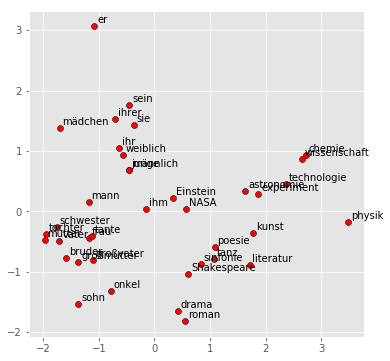

In [ ]:
display_pca_scatterplot(wv_2010, ["weiblich","frau","mädchen","schwester","sie","ihr","ihrer","tochter","mutter","tante","großmutter","männlich","mann","junge","bruder","er","ihm","sein","sohn","vater","onkel","großvater","wissenschaft","technologie","physik","chemie","Einstein","NASA","experiment","astronomie","poesie","kunst","Shakespeare","tanz","literatur","roman","sinfonie","drama"])
plt.savefig('/PCA/2010.png')

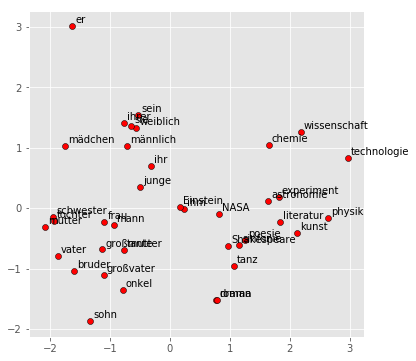

In [ ]:
display_pca_scatterplot(wv_2020, ["weiblich","frau","mädchen","schwester","sie","ihr","ihrer","tochter","mutter","tante","großmutter","männlich","mann","junge","bruder","er","ihm","sein","sohn","vater","onkel","großvater","wissenschaft","technologie","physik","chemie","Einstein","NASA","experiment","astronomie","poesie","kunst","Shakespeare","tanz","literatur","roman","sinfonie","drama"])
plt.savefig('/PCA/2020.png')